<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x360 at 0x7C0827E5FEE0>
[{'boxes': tensor([[581.0438, 179.7575, 639.3959, 358.6631],
        [280.8135, 138.1383, 376.9598, 356.9260],
        [ 12.4161, 116.6037,  91.4759, 284.0132],
        [ 63.4067, 132.9237,  98.1493, 276.0856],
        [401.7480,  73.1864, 564.2243, 250.7206],
        [425.5503,  98.3406, 466.2253, 127.2269],
        [585.3243, 163.4413, 598.8544, 189.0802],
        [323.9995,  72.0142, 415.1530, 224.1507],
        [599.2557, 163.9827, 610.1838, 190.5199],
        [554.0243, 169.4327, 567.6538, 203.0711],
        [324.2624,  73.6935, 416.2501, 229.3656],
        [ 19.2962, 272.2401,  96.0376, 285.7950],
        [294.3995, 152.1142, 314.9640, 194.7582],
        [ 73.2919, 138.1355,  93.7087, 201.7034],
        [553.4114, 185.5603, 565.1608, 218.8303],
        [633.9028, 198.1586, 640.0000, 214.8640],
        [582.1827, 177.3626, 599.1335, 194.5264],
        [564.4203, 177.1828, 573.9962, 201.3738],
       

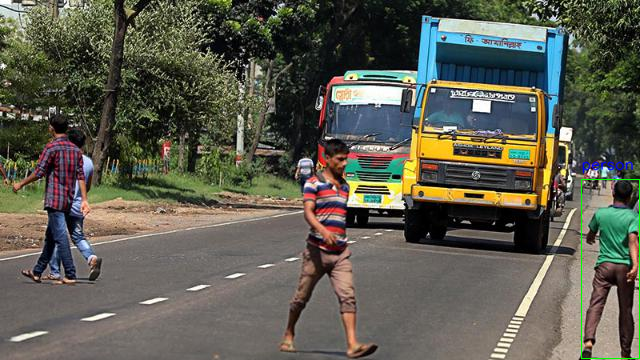

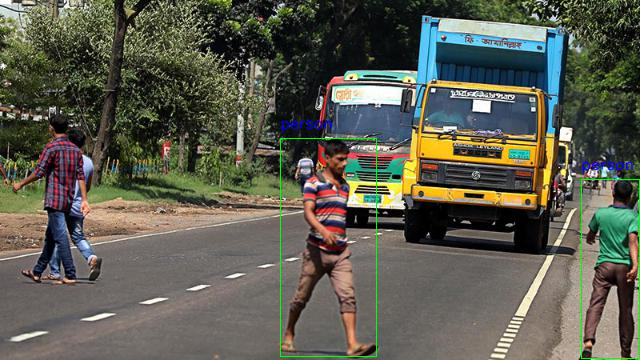

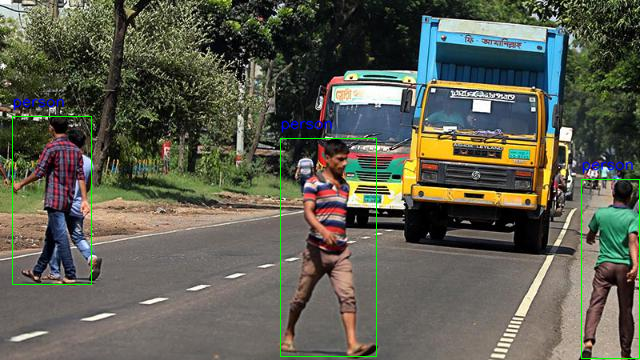

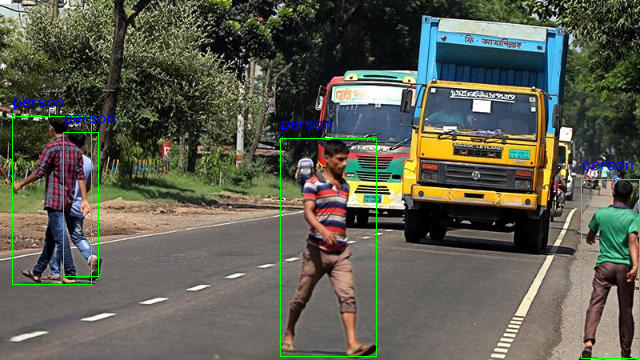

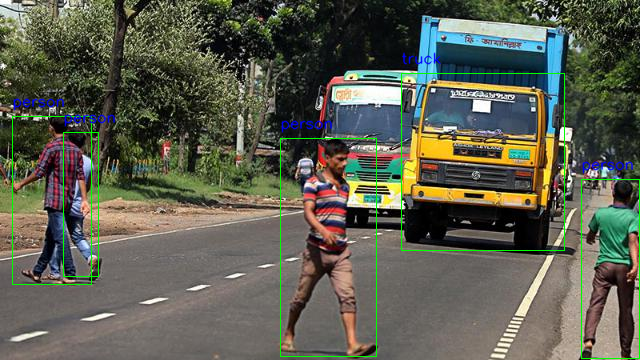

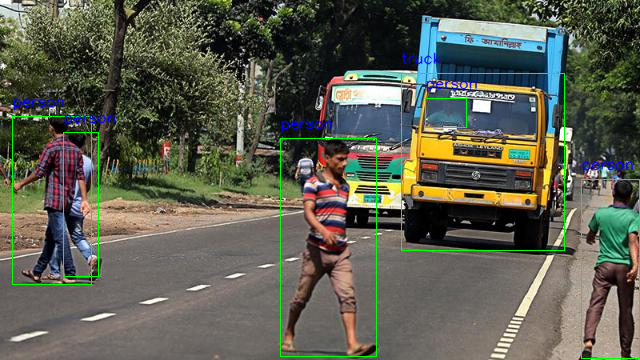

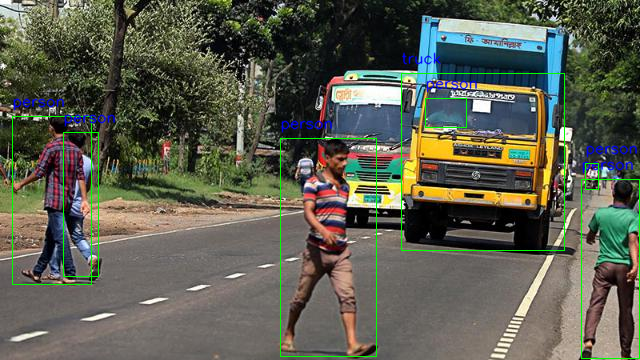

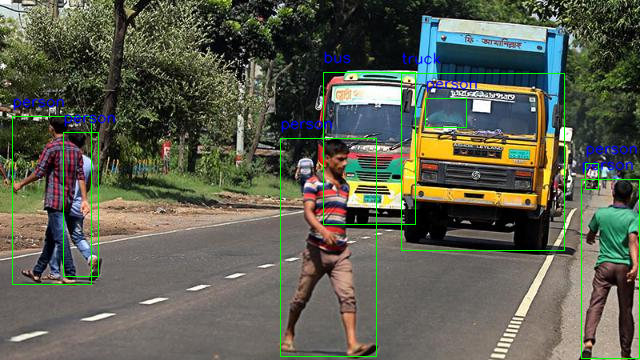

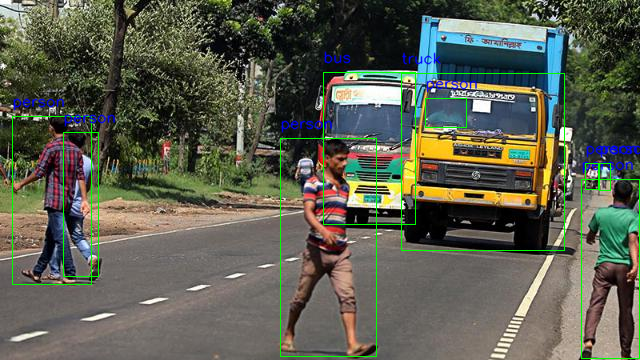

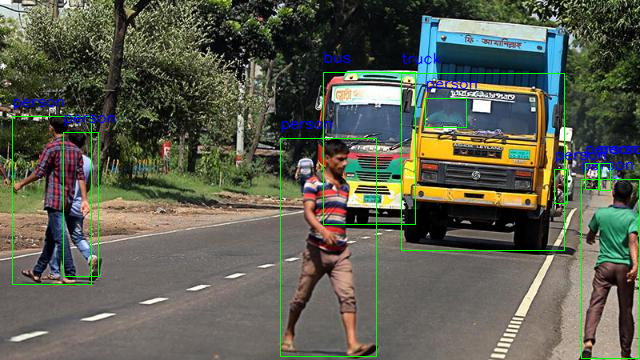

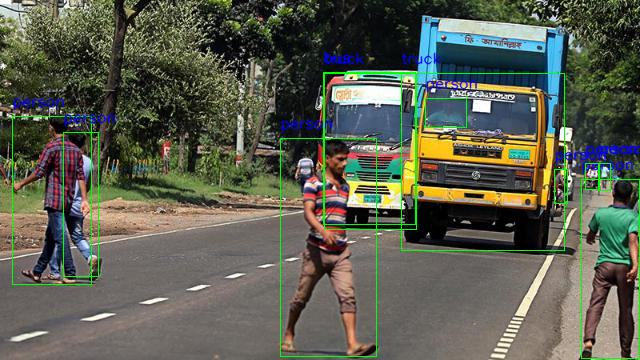

IndexError: ignored

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as transforms
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import os

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

directory_path = '/content/drive/MyDrive/Lamborghini'
file_in_diretory = os.listdir(directory_path)
file_name = 'Test03.jpg'
file_path = os.path.join(directory_path, file_name)
input_image = Image.open(file_path)
print(input_image)
transform = transforms.Compose([transforms.ToTensor()])
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    prediction = model(input_batch)


print(prediction)
prediction[0].keys()
boxes, labels, scores = prediction[0]["boxes"], prediction[0]["labels"], prediction[0]["scores"]
num =torch.argwhere(scores > 0.7).shape[0]
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter"]
font = cv2.FONT_HERSHEY_SIMPLEX
input_image = cv2.imread(file_path)
for i in range(num):
  x1, y1 , x2 , y2 = boxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i] -1]
  input_image = cv2.rectangle (input_image , (x1, y1), (x2 , y2), (0, 255 ,0),1)
  input_image = cv2.putText(input_image, class_name, (x1, y1 -10), font, 0.5 , (255, 0 ,0), 1 ,cv2.LINE_AA)
  cv2_imshow(input_image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


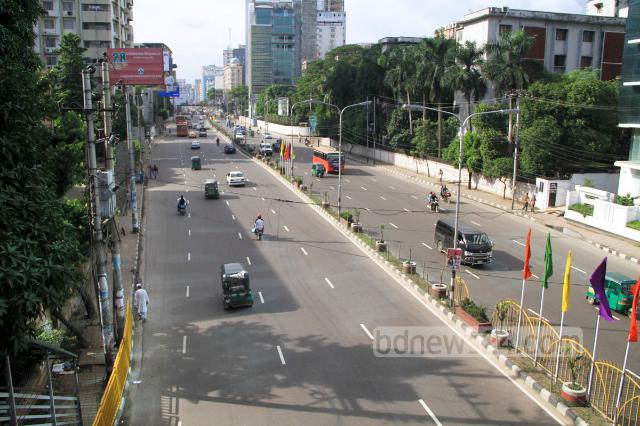

In [ ]:
input_image